In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
import cv2
import tensorflow as tf



In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
x_train /= 255
x_test /= 255

In [10]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
model = Sequential()

# Convnet Layer:
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Classification Layer:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [13]:
model.fit(x_train, y_train,batch_size=128,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 45s 87ms/step - loss: 0.4008 - accuracy: 0.8759 - val_loss: 0.0730 - val_accuracy: 0.9787
Epoch 2/10
469/469 [==============================] - 39s 83ms/step - loss: 0.1202 - accuracy: 0.9689 - val_loss: 0.0419 - val_accuracy: 0.9869
Epoch 3/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0798 - accuracy: 0.9787 - val_loss: 0.0416 - val_accuracy: 0.9877
Epoch 4/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0664 - accuracy: 0.9829 - val_loss: 0.0321 - val_accuracy: 0.9897
Epoch 5/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0552 - accuracy: 0.9859 - val_loss: 0.0299 - val_accuracy: 0.9912
Epoch 6/10
469/469 [==============================] - 40s 84ms/step - loss: 0.0494 - accuracy: 0.9877 - val_loss: 0.0350 - val_accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0413 - accuracy: 0.9894 - val_loss: 0.0270 - val_accuracy:

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029976697638630867
Test accuracy: 0.9916999936103821


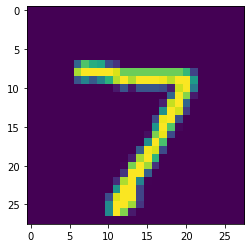

In [15]:
import matplotlib.pyplot as plt

plt.imshow(x_test[:1].reshape(28,28))
plt.show()

In [16]:
pre = model.predict(x_test[:1])

1/1 [==============================] - 0s 411ms/step


In [17]:
import numpy as np
max_index = np.argmax(pre, axis=1)

In [18]:
max_index

array([7], dtype=int64)

In [19]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5


In [20]:
img = tf.keras.utils.load_img( '3_28.png'  )
input_arr = tf.keras.utils.img_to_array(img)
input_arr = np.array([input_arr])  # Convert single image to a batch.


In [21]:
input_arr.shape

(1, 28, 28, 3)

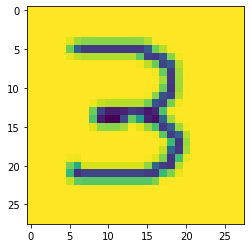

In [22]:
img = cv2.resize(cv2.imread("3_28.png", cv2.IMREAD_GRAYSCALE),  (28,28))

test_image = np.array(img).reshape(-1, 28, 28, 1)
plt.imshow(test_image.reshape(28,28))

plt.show()

In [23]:
pred1 = model.predict(test_image[:1])

1/1 [==============================] - 0s 221ms/step


In [24]:
max_index1 = np.argmax(pred1, axis=1)

In [25]:
max_index1

array([8], dtype=int64)